Objective:
1. Implement ANN classifier for mnist_corrupted images(https://www.tensorflow.org/datasets/catalog/mnist_corrupted)
2. Utilize Confusion Matrix to check for ANN classification result.

#### Import relevant packages

In [ ]:
!pip install tensorflow
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

#### (a) Load the dataset `mnist_corrupted/zigzag` from `tensorflow_datasets`. [**2 points**]

In [ ]:
import tensorflow_datasets as tfds

## write your code here
#Load as a single batch
dataset_name = "mnist_corrupted/zigzag"
train_images, train_labels = tfds.as_numpy(tfds.load(dataset_name, split='train' ,batch_size=-1, as_supervised=True))
test_images, test_labels   = tfds.as_numpy(tfds.load(dataset_name, split='test', batch_size=-1, as_supervised=True))

In [ ]:
# Test size of different loaded numpy arrays
print('Image size:', train_images[0].shape)
print('Training data size:',train_images.shape)
print('Testing data size:', test_images.shape)

Image size: (28, 28, 1)
Training data size: (60000, 28, 28, 1)
Testing data size: (10000, 28, 28, 1)


#### (b) Build a dense ANN with at least one hidden layer with at least two nodes. You should try different hyper parameter configurations to get the best performing ANN (atleast 90% accuracy). [**2 points**]

In [ ]:
model = tf.keras.Sequential()
# for there are 10 decimal integers
outputs = 10
## write your code here to build your dense ANN. Input layer is created below
model.add(layers.Flatten(input_shape=(train_images[0].shape)))        
model.add(layers.Dense(128, activation=tf.nn.relu))      # one hidden layer
model.add(layers.Dense(128, activation=tf.nn.relu))      # two hidden layer
model.add(layers.Dense(128, activation=tf.nn.relu))      # three hidden layer
model.add(layers.Dense(outputs, activation=tf.nn.softmax))   # one output layer with 10 outputs

#### (c) Answer the following questions: [**1 point**]

What is the size of your output layer? [10]

What is the activation function of your output layer? [Softmax]

#### (d) Compile and train your model [**2 points**]

What is the loss function you use? [Sparse Multiclass Cross-Entropy Loss]

In [ ]:
### write your code her to compile model
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
### write your code here to train your model
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=64)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 1.7220 - accuracy: 0.7972
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3465 - accuracy: 0.9013
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2486 - accuracy: 0.9264
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2128 - accuracy: 0.9365
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1859 - accuracy: 0.9441
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1662 - accuracy: 0.9497
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1420 - accuracy: 0.9577
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1298 - accuracy: 0.9605
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1199 - accuracy: 0.9636
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1144 - accuracy: 0.9652

#### (e) Plot the training loss across the different epochs [**1 point**]

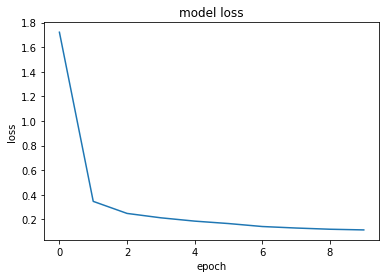

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#### (f) What is the overall accuracy and per-class accuracy on test dataset? [**1 point**]

In [ ]:
#### write your code to report overall accuracy on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.1890 - accuracy: 0.9524


What is the overall accuracy? [0.9524]

In [ ]:
predictions = model.predict(test_images)
predicted_labels = []
for predicted in predictions:
  predicted_labels.append(np.argmax(predicted))

313/313 [==============================] - 1s 1ms/step



Classification Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.92      0.96      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.98      0.89      0.93       892
           6       0.95      0.96      0.96       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.92      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matrix



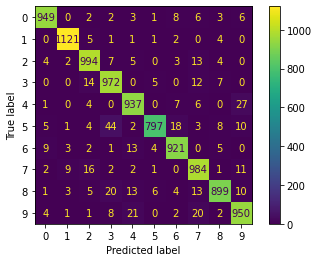

In [ ]:
### write your code to report per-class accuracy
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_labels, predicted_labels))

### Use confusion matrix from sklearn. 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion = confusion_matrix(test_labels, predicted_labels)
print('Confusion Matrix\n')
display = ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels=[0,1,2,3,4,5,6,7,8,9])
display.plot()
plt.show()

**Code to visualize the predictions**

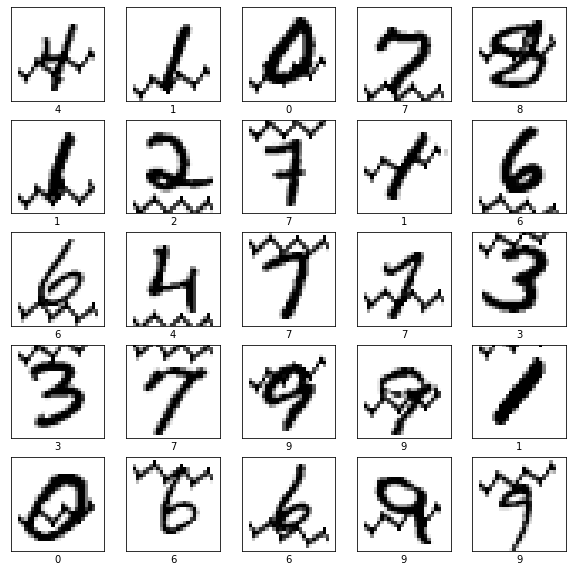

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    #print(train_labels[i][0])
    plt.xlabel(class_names[train_labels[i]])